# Applying Generative Adversal Network on CAR DATASET

# Preparing Custom dataset

Train Folders: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
Test Folders: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']

Train Folder Image Counts:
Audi: 814 images
Hyundai Creta: 271 images
Mahindra Scorpio: 316 images
Rolls Royce: 311 images
Swift: 424 images
Tata Safari: 441 images
Toyota Innova: 775 images

Test Folder Image Counts:
Audi: 199 images
Hyundai Creta: 67 images
Mahindra Scorpio: 75 images
Rolls Royce: 74 images
Swift: 102 images
Tata Safari: 106 images
Toyota Innova: 190 images


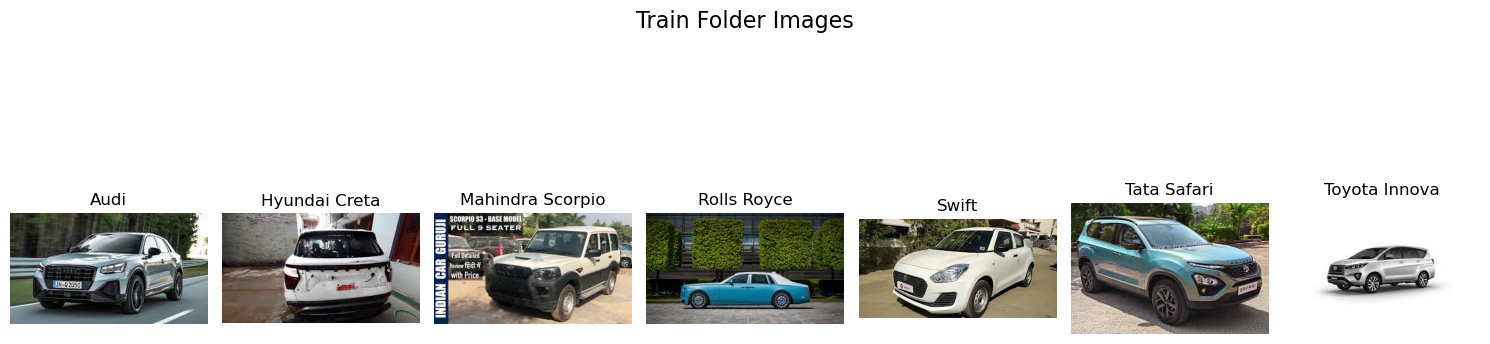

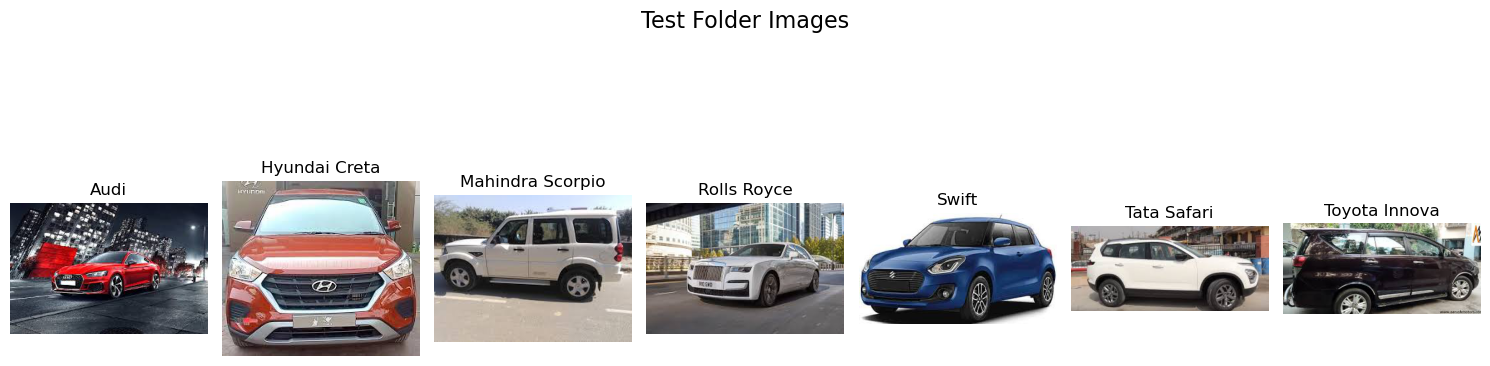

In [38]:
import os
from PIL import Image
import matplotlib.pyplot as plt
#####       use matplotlib along with Pillow for image handling.
# Dataset paths
dataset_path = r"C:\Users\ASUS\DL practice\Cars Dataset"
train_path = os.path.join(dataset_path, "train")
#     os.path.join: Joins folder paths
test_path = os.path.join(dataset_path, "test")

# List folders in train and test directories
train_folders = sorted(os.listdir(train_path))
test_folders = sorted(os.listdir(test_path))

##    os.listdir(train_path): Lists all files and subdirectories in the train_path.
##   sorted(): Sorts the list of folder names alphabetically to maintain consistent order.


print("Train Folders:", train_folders)
print("Test Folders:", test_folders)

# Inspect the number of images in each folder
print("\nTrain Folder Image Counts:")
for folder in train_folders:
    folder_path = os.path.join(train_path, folder)
    print(f"{folder}: {len(os.listdir(folder_path))} images")

print("\nTest Folder Image Counts:")
for folder in test_folders:
    folder_path = os.path.join(test_path, folder)
    print(f"{folder}: {len(os.listdir(folder_path))} images")

# Helper function to display images
def display_images_from_folders(base_path, folder_names, title):
    fig, axes = plt.subplots(1, len(folder_names), figsize=(15, 5))
     # plt.subplots(): Creates a grid of subplots. 1 specifies one row, 
    # and len(folder_names) sets the number of columns (one for each folder).
    
    fig.suptitle(title, fontsize=16) #fig.suptitle(): Sets the main title for the figure.
    
    for i, folder in enumerate(folder_names):
        folder_path = os.path.join(base_path, folder)
        img_name = os.listdir(folder_path)[0]  # First image in the folder
        ###    os.listdir(folder_path)[0]: Fetches the first image in each folder
        img_path = os.path.join(folder_path, img_name)
        
        # Load and display image
        img = Image.open(img_path)
        # Image.open(): Loads the image at the specified path.
        axes[i].imshow(img)
        # Displays the image on the ith subplot.
        axes[i].axis('off')
        axes[i].set_title(folder)# Sets the folder name as the title of the subplot.
    
    plt.tight_layout() #plt.tight_layout(): Adjusts spacing between subplots to avoid overlap.
    plt.show() #plt.show(): Displays the figure.

# Display one image per folder for train
display_images_from_folders(train_path, train_folders, "Train Folder Images")

# Display one image per folder for test
display_images_from_folders(test_path, test_folders, "Test Folder Images")


# Code to Merge Train and Test Folders

 use Python's os and shutil libraries

In [41]:
import os
import shutil

# Define paths
dataset_path = r"C:\Users\ASUS\DL practice\Cars Dataset"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
combined_path = os.path.join(dataset_path, "combined")

# Create the combined folder if it doesn't exist
os.makedirs(combined_path, exist_ok=True)

# Get list of folders
train_folders = sorted(os.listdir(train_path))
test_folders = sorted(os.listdir(test_path))

# Merge train and test folders
for folder in train_folders:
    # Define paths for train and test folder
    train_folder_path = os.path.join(train_path, folder)
    test_folder_path = os.path.join(test_path, folder)
    
    # Define the target combined folder path
    combined_folder_path = os.path.join(combined_path, folder)
    
    # Create the combined folder if it doesn't exist
    os.makedirs(combined_folder_path, exist_ok=True)
    
    # Copy files from train folder to combined folder
    for file_name in os.listdir(train_folder_path):
        source_file = os.path.join(train_folder_path, file_name)
        target_file = os.path.join(combined_folder_path, file_name)
        shutil.copy(source_file, target_file)
    
    # Copy files from test folder to combined folder
    for file_name in os.listdir(test_folder_path):
        source_file = os.path.join(test_folder_path, file_name)
        target_file = os.path.join(combined_folder_path, file_name)
        shutil.copy(source_file, target_file)

print("Train and Test folders have been merged into the 'combined' folder.")


Train and Test folders have been merged into the 'combined' folder.


*Code to Merge All Images into One Folder*

In [43]:
import os
import shutil

# Define paths
dataset_path = r"C:\Users\ASUS\DL practice\Cars Dataset"
combined_path = os.path.join(dataset_path, "combined")
final_merged_folder = os.path.join(dataset_path, "merged")

# Create the final merged folder if it doesn't exist
os.makedirs(final_merged_folder, exist_ok=True)

# List all subfolders in the combined folder
combined_folders = sorted(os.listdir(combined_path))

# Counter to ensure unique filenames
image_counter = 1

# Copy all images into the merged folder
for folder in combined_folders:
    folder_path = os.path.join(combined_path, folder)
    for file_name in os.listdir(folder_path):
        source_file = os.path.join(folder_path, file_name)
        
        # Create a unique filename to avoid conflicts
        new_file_name = f"image_{image_counter}.jpg"
        target_file = os.path.join(final_merged_folder, new_file_name)
        
        # Copy the file
        shutil.copy(source_file, target_file)
        
        # Increment the counter
        image_counter += 1

print(f"All images have been merged into the '{final_merged_folder}' folder.")


All images have been merged into the 'C:\Users\ASUS\DL practice\Cars Dataset\merged' folder.


# Resizing the images

In [45]:
import cv2
import os

# Define paths
dataset_path = r"C:\Users\ASUS\DL practice\Cars Dataset"
merged_folder_path = os.path.join(dataset_path, "merged")
resized_folder_path = os.path.join(dataset_path, "resized_images")

# Create the resized folder if it doesn't exist
os.makedirs(resized_folder_path, exist_ok=True)

# Define the size for resizing
im_size = 128  # The square size for the resized images

# Iterate through all images in the merged folder
for file_name in os.listdir(merged_folder_path):
    # Construct the full path to the image
    file_path = os.path.join(merged_folder_path, file_name)
    
    # Read the image using OpenCV
    img = cv2.imread(file_path)
    
    # Check if the file is a valid image
    if img is not None:
        # Resize the image to the specified square dimensions
        resized_img = cv2.resize(img, (im_size, im_size))
        
        # Save the resized image to the resized folder
        resized_file_path = os.path.join(resized_folder_path, file_name)
        cv2.imwrite(resized_file_path, resized_img)
        
        # Print the shape of the resized image
        print(f"Resized and saved: {file_name} -> {resized_img.shape}")
    else:
        print(f"Skipping invalid image: {file_name}")

print("All images have been resized and saved to the 'resized_images' folder.")


Resized and saved: image_1.jpg -> (128, 128, 3)
Resized and saved: image_10.jpg -> (128, 128, 3)
Resized and saved: image_100.jpg -> (128, 128, 3)
Resized and saved: image_1000.jpg -> (128, 128, 3)
Resized and saved: image_1001.jpg -> (128, 128, 3)
Resized and saved: image_1002.jpg -> (128, 128, 3)
Resized and saved: image_1003.jpg -> (128, 128, 3)
Resized and saved: image_1004.jpg -> (128, 128, 3)
Resized and saved: image_1005.jpg -> (128, 128, 3)
Resized and saved: image_1006.jpg -> (128, 128, 3)
Resized and saved: image_1007.jpg -> (128, 128, 3)
Resized and saved: image_1008.jpg -> (128, 128, 3)
Resized and saved: image_1009.jpg -> (128, 128, 3)
Resized and saved: image_101.jpg -> (128, 128, 3)
Resized and saved: image_1010.jpg -> (128, 128, 3)
Resized and saved: image_1011.jpg -> (128, 128, 3)
Resized and saved: image_1012.jpg -> (128, 128, 3)
Resized and saved: image_1013.jpg -> (128, 128, 3)
Resized and saved: image_1014.jpg -> (128, 128, 3)
Resized and saved: image_1015.jpg -> (

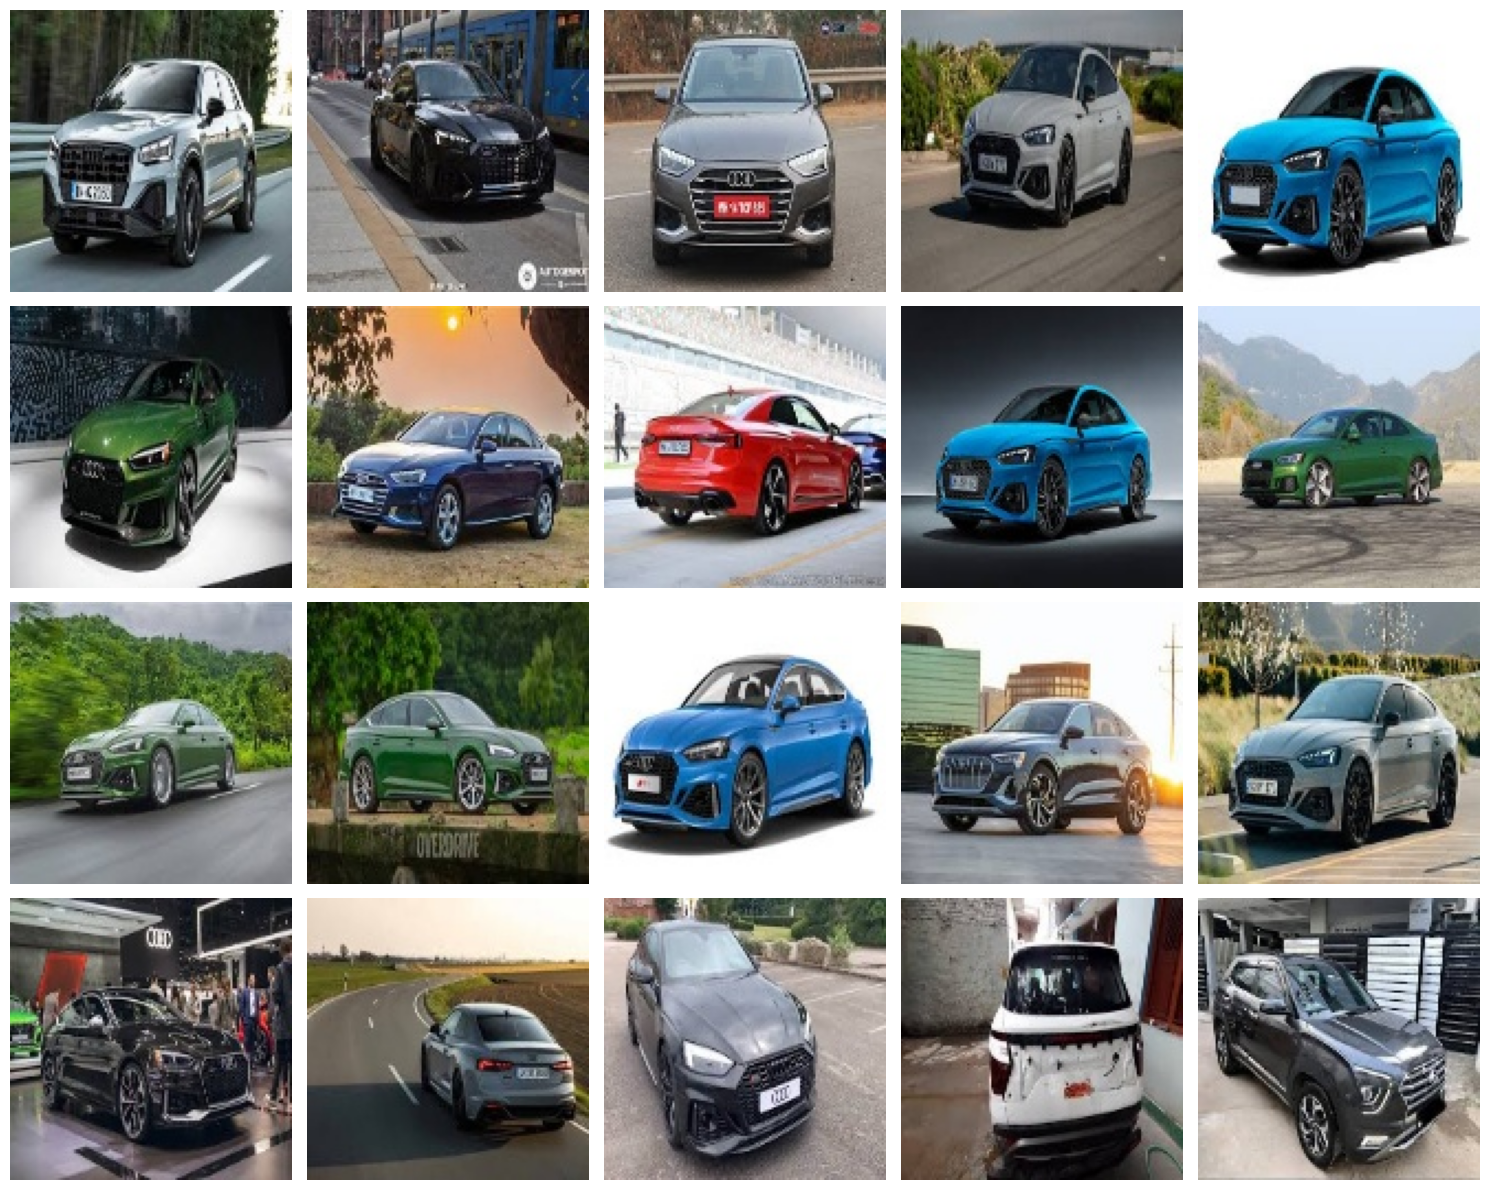

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the path to the resized images folder (renamed to dataset_path)
dataset_path = r"C:\Users\ASUS\DL practice\Cars Dataset\resized_images"

# Get a list of image file names
image_files = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

# Display the first 20 images (or fewer if there are less than 20)
num_images_to_display = min(20, len(image_files))
fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # 4 rows, 5 columns grid

for i, ax in enumerate(axes.flatten()):
    if i < num_images_to_display:
        img_path = os.path.join(dataset_path, image_files[i])
        img = cv2.imread(img_path)  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
        ax.imshow(img)  # Show the image
        #ax.set_title(image_files[i])  # Set the image file name as the title
        ax.axis('off')  # Hide the axes
  

plt.tight_layout()
plt.show()


# Import Libraries

In [32]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, BatchNormalization, Conv2DTranspose, Conv2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



* os: Helps interact with the operating system, such as creating folders or reading file paths.
* numpy (np): A library for handling arrays, which are crucial for image data manipulation.
* tensorflow.keras.models.Sequential: A simple way to build neural networks layer-by-layer.
* Layers (Dense, Flatten, etc.):
  
Reshape: Converts 1D data into 2D/3D (used in the generator).
LeakyReLU: A type of activation function that helps prevent dead neurons.

BatchNormalization: Normalizes activations during training, improving stability.

Dropout: Prevents overfitting by randomly "dropping out" some neurons during training.

In [35]:
# Paths
dataset_path = r"C:\Users\ASUS\DL practice\Cars Dataset\resized_images"
output_folder = "generated_car_images"
os.makedirs(output_folder, exist_ok=True)  # Ensure folder is created

In [37]:
# Hyperparameters
IMG_SIZE = 128  # Size to resize input images to
LATENT_DIM = 200  # Latent vector dimension (random noise)
BATCH_SIZE = 64  # Batch size for training: Number of images processed together during training
EPOCHS = 3000  # Number of training epochs:Total number of training cycles through the entire dataset.
SAVE_INTERVAL = 200  # Save images every 20 epochs


In [39]:
# Load images
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))  # Keep original size
        img_array = img_to_array(img) / 127.5 - 1.0  # Normalize to [-1, 1] for tanh activation
        images.append(img_array)
    return np.array(images)


In [41]:
# Load data and split
data = load_images_from_folder(dataset_path)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Generator

In [42]:
def build_generator():
    model = Sequential([
        # Dense layer with sufficient size to transform latent vector into image
        Dense(8 * 8 * 256, input_dim=LATENT_DIM),  # Smaller intermediate size  #Dense: Maps the random noise to an 8x8x256 latent feature space.
        LeakyReLU(alpha=0.2),
        Reshape((8, 8, 256)),  # Start from 8x8x256  #Reshape: Converts 1D output to 8x8x256 3D tensor.
        BatchNormalization(momentum=0.8),
        
        # First upsampling block
        Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),  # (8x8x256) -> (16x16x128)
        # # # Conv2DTranspose: Upsamples the image, doubling its dimensions each time.
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        
        # Second upsampling block
        Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),  # (16x16x128) -> (32x32x64)
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        
        # Third upsampling block
        Conv2DTranspose(32, kernel_size=4, strides=2, padding="same"),  # (32x32x64) -> (64x64x32)
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        
        # Fourth upsampling block
        Conv2DTranspose(3, kernel_size=4, strides=2, padding="same", activation="tanh"),  # (64x64x32) -> (128x128x3)
    ])
    return model


In [43]:
build_generator().summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16384)             3293184   
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 batch_normalization_8 (Bat  (None, 8, 8, 256)         1024      
 chNormalization)                                                
                                                                 
 conv2d_transpose_8 (Conv2D  (None, 16, 16, 128)       524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 16, 16, 128)      

# Discriminator

In [44]:
def build_discriminator():
    model = Sequential([
        # First convolutional block for downsampling
        Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=(IMG_SIZE, IMG_SIZE, 3)),  # (128x128x3) -> (64x64x64)
        #Conv2D: Extracts features by reducing the image size.
        LeakyReLU(alpha=0.2),
        Dropout(0.5),
        
        # Second convolutional block for further downsampling
        Conv2D(128, kernel_size=4, strides=2, padding="same"),  # (64x64x64) -> (32x32x128)
        LeakyReLU(alpha=0.2),
        Dropout(0.5),
        
        # Third convolutional block for further downsampling
        Conv2D(256, kernel_size=4, strides=2, padding="same"),  # (32x32x128) -> (16x16x256)
        LeakyReLU(alpha=0.2),
        Dropout(0.5),
        
        # Fourth convolutional block
        Conv2D(512, kernel_size=4, strides=2, padding="same"),  # (16x16x256) -> (8x8x512)
        LeakyReLU(alpha=0.2),
        Dropout(0.5),
        
        # Flatten and add the output layer (sigmoid for binary classification)
        Flatten(),
        Dense(1, activation='sigmoid') # Outputs a probability (real = 1, fake = 0).
        
    ])
    model.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [45]:
build_discriminator().summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        3136      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 dropout_8 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       131200    
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 32, 32, 128)       0         
                                                                 
 dropout_9 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 256)      

In [46]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during generator training
    model = Sequential([generator, discriminator])
    model.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')
    return model


In [47]:
# Instantiate models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Training The Model

In [48]:
# Training function with loss plotting
def train_gan(generator, discriminator, gan, data, epochs, batch_size, save_interval):
    half_batch = batch_size // 2
    ##half_batch = batch_size // 2: The discriminator is trained on an equal mix of real and fake images. 
    #A batch is split into half for this reason.
    total_images = data.shape[0] # Counts the total number of images in the training dataset.

    # Lists to store losses
    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        #The main training loop iterates through the number of epochs,
        # where each epoch represents one full pass through the training process.
        # Train discriminator with real images
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_imgs = data[idx]
        real_labels = np.ones((half_batch, 1)) #Assigns a label of 1 (real) to all the real images.

        # Generate fake images
        noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
        fake_imgs = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))#Assigns a label of 0 (fake) to all the fake images.

        # Train discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
        #train_on_batch: This method updates the weights of the discriminator for a single batch of images:
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) #Averages the real and fake losses to calculate the overall discriminator loss.

        # Train generator via GAN
        noise = np.random.normal(0, 1, (batch_size, LATENT_DIM))
        valid_labels = np.ones((batch_size, 1)) #The generator aims to "fool" the discriminator, so it uses labels of 1 (real) for all generated images.
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Store losses
        d_losses.append(d_loss[0]) #racks the discriminator's loss over time.
        g_losses.append(g_loss) #Tracks the generator's loss.

        # Print progress
        if epoch % 10 == 0:
            print(f"{epoch}/{epochs} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}] [G loss: {g_loss:.4f}]")

        # Save generated images at final epoch or specified interval
        if epoch == epochs - 1:   # Save generated images at final epoch
            save_generated_images(generator, epoch, total_images, output_folder)# Save images==no. of input real images

    # Plot the losses after training
    plot_losses(d_losses, g_losses)


# Function to plot losses
def plot_losses(d_losses, g_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(d_losses, label="Discriminator Loss")
    plt.plot(g_losses, label="Generator Loss")
    plt.title("GAN Training Losses")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()



 


def save_generated_images(generator, epoch, num_images, output_folder):
    # Generate fake images
    noise = np.random.normal(0, 1, (num_images, LATENT_DIM))  # Generate noise for the required number of images
    gen_imgs = generator.predict(noise)  # Generate fake images using the generator
    
    # Rescale images from [-1, 1] to [0, 1] for saving
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale images from [-1, 1] to [0, 1]
    
    # Debug print to check the generated image shape
    print(f"Generated {num_images} images for epoch {epoch}. Shape of gen_imgs: {gen_imgs.shape}")
    
    # Save each generated image
    for i in range(num_images):
        img_path = os.path.join(output_folder, f"epoch_{epoch}_image_{i}.png")
        plt.imsave(img_path, gen_imgs[i])  # Save image to disk #Uses plt.imsave to save each generated image in the specified output folder.
    
    print(f"Saved {num_images} images at epoch {epoch}.")
    
    # Display a few generated images
    plt.figure(figsize=(10, 10))
    for i in range(16):  # Display the first 16 images
        plt.subplot(4, 4, i + 1)
        plt.imshow(gen_imgs[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()




1/1 [==============================] - 0s 445ms/step
0/3000 [D loss: 0.6881, acc.: 34.38] [G loss: 0.3807]
1/1 [==============================] - 0s 108ms/step
10/3000 [D loss: 0.0074, acc.: 100.00] [G loss: 0.0020]
1/1 [==============================] - 0s 120ms/step
20/3000 [D loss: 0.0075, acc.: 100.00] [G loss: 0.0644]
1/1 [==============================] - 0s 114ms/step
30/3000 [D loss: 0.4478, acc.: 81.25] [G loss: 5.5523]
1/1 [==============================] - 0s 114ms/step
40/3000 [D loss: 1.5456, acc.: 51.56] [G loss: 18.9280]
1/1 [==============================] - 0s 115ms/step
50/3000 [D loss: 0.5882, acc.: 62.50] [G loss: 1.6795]
1/1 [==============================] - 0s 121ms/step
60/3000 [D loss: 0.6164, acc.: 62.50] [G loss: 1.3547]
1/1 [==============================] - 0s 97ms/step
70/3000 [D loss: 0.5543, acc.: 78.12] [G loss: 1.2149]
1/1 [==============================] - 0s 108ms/step
80/3000 [D loss: 0.5832, acc.: 75.00] [G loss: 1.2914]
1/1 [======================

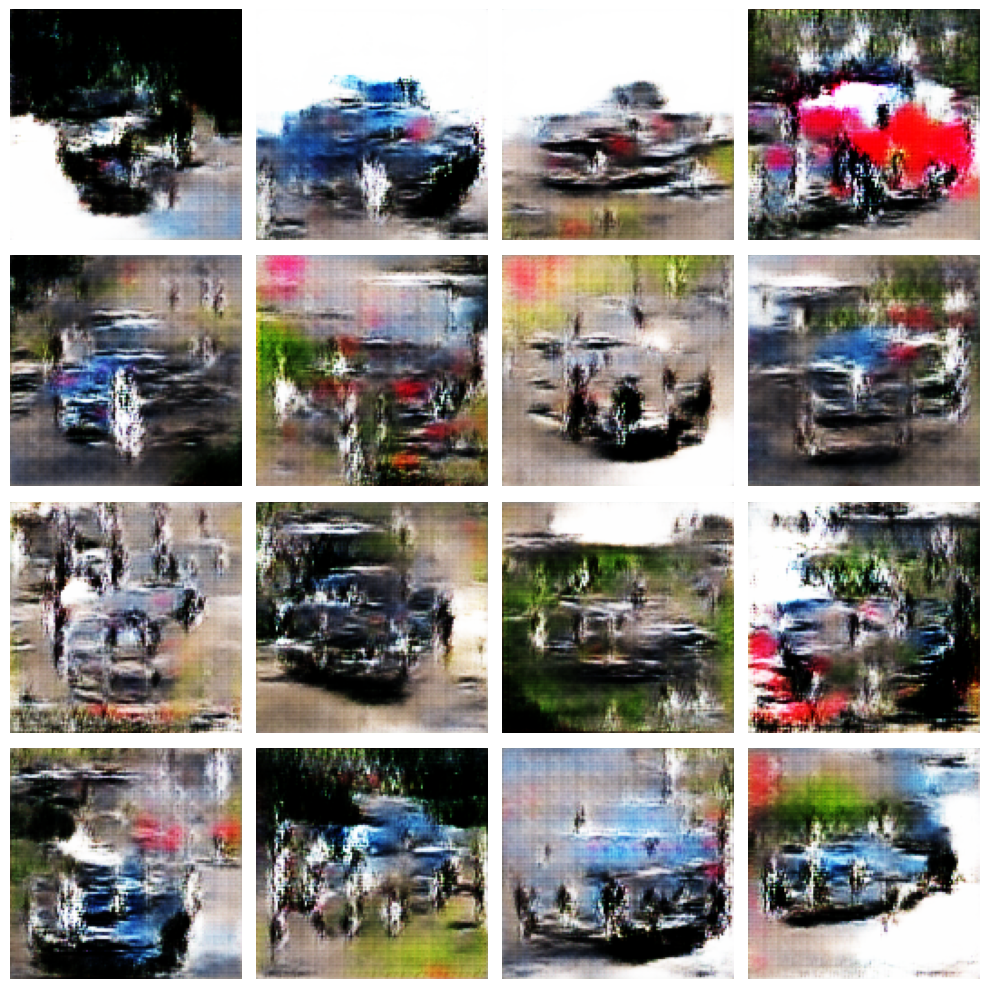

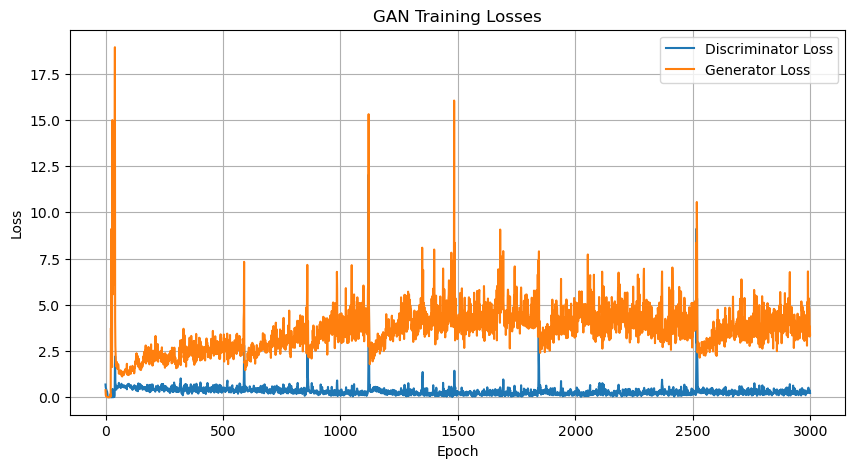

In [49]:
# Train the GAN
train_gan(generator, discriminator, gan, train_data, EPOCHS, BATCH_SIZE, SAVE_INTERVAL)